In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Define your file paths
fraud_data_path = '/content/drive/My Drive/Fraud_Data.csv'
ip_country_path = '/content/drive/My Drive/IpAddress_to_Country.csv'
creditcard_path = '/content/drive/My Drive/creditcard.csv'


In [5]:
!ls '/content/drive/My Drive/creditcard.csv.zip'


 back.jpg			    'Google AI Studio'
'Bereket Tadesse Eshete G (1).pdf'   id
'Bereket Tadesse Eshete G (2).pdf'  '📄 Interim Report.pdf'
'Bereket Tadesse Eshete G (3).pdf'   IpAddress_to_Country.csv
'Bereket Tadesse Eshete G.pdf'	    'Peer-Mentorship-Exercise (1).pdf'
'Colab Notebooks'		     privasea_Bereket_505.txt
 complaints.csv			     vector_db_demo.ipynb
'Copy of back.jpg'		     vector_store
 creditcard.csv.zip		    'Week 4 Careers Exercise.pdf'
'download (1).pdf'		     Week4_final_Report.pdf
 filtered_complaints.csv	    'Week 5 final.pdf'
 Fraud_Data.csv			    'week 7.pdf'
 front.jpg


In [6]:

import pandas as pd
import zipfile



# Define path to ZIP file in your Google Drive
zip_path = '/content/drive/My Drive/creditcard.csv.zip'

# Open the zip and read the CSV inside
with zipfile.ZipFile(zip_path, 'r') as z:
    # Show file names in zip (useful if you're unsure of the exact file name)
    print("Files in ZIP:", z.namelist())

    # Load the creditcard.csv file directly
    with z.open('creditcard.csv') as f:
        creditcard_df = pd.read_csv(f)


Files in ZIP: ['creditcard.csv']


In [9]:
import pandas as pd

# Load the datasets
fraud_df = pd.read_csv(fraud_data_path)
ip_country_df = pd.read_csv(ip_country_path)


# Preview
print("Fraud Data:", fraud_df.shape)
print("IP to Country Mapping:", ip_country_df.shape)
print("Credit Card Data:", creditcard_df.shape)


Fraud Data: (151112, 11)
IP to Country Mapping: (138846, 3)
Credit Card Data: (284807, 31)


In [11]:
# STEP 3: Quick preview of the datasets
print("Fraud Data Overview:")
print(fraud_df.info(), "\n")

print("IP to Country Mapping Overview:")
print(ip_country_df.info(), "\n")

print("Credit Card Data Overview:")
print(creditcard_df.info(), "\n")


Fraud Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 151112 entries, 115086 to 59454
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 13.8+ MB
None 

IP to Country Mapping Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 en

In [10]:
# Handle missing values
fraud_df.dropna(inplace=True)
ip_country_df.dropna(inplace=True)
creditcard_df.dropna(inplace=True)

# Remove duplicates
fraud_df.drop_duplicates(inplace=True)
ip_country_df.drop_duplicates(inplace=True)
creditcard_df.drop_duplicates(inplace=True)

# Convert timestamps in fraud data
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Sort by purchase time (optional but helpful)
fraud_df.sort_values(by='purchase_time', inplace=True)

# Preview cleaned data
fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
115086,309557,2015-01-01 00:00:43,2015-01-01 00:00:44,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1
41990,124539,2015-01-01 00:00:44,2015-01-01 00:00:45,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1
134836,161246,2015-01-01 00:00:45,2015-01-01 00:00:46,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1
24572,356414,2015-01-01 00:00:46,2015-01-01 00:00:47,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1
106160,338656,2015-01-01 00:00:47,2015-01-01 00:00:48,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1


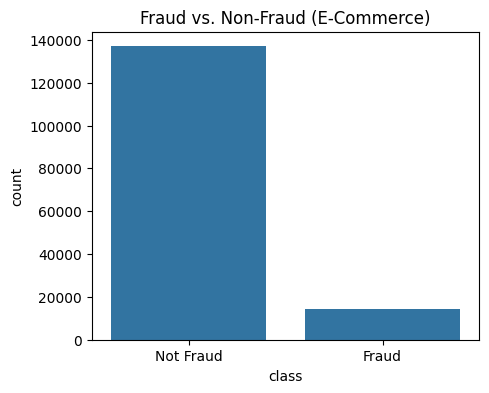

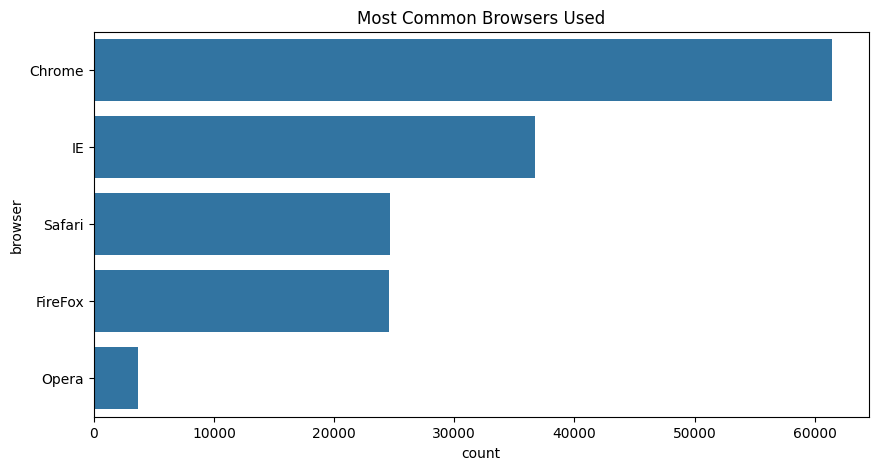

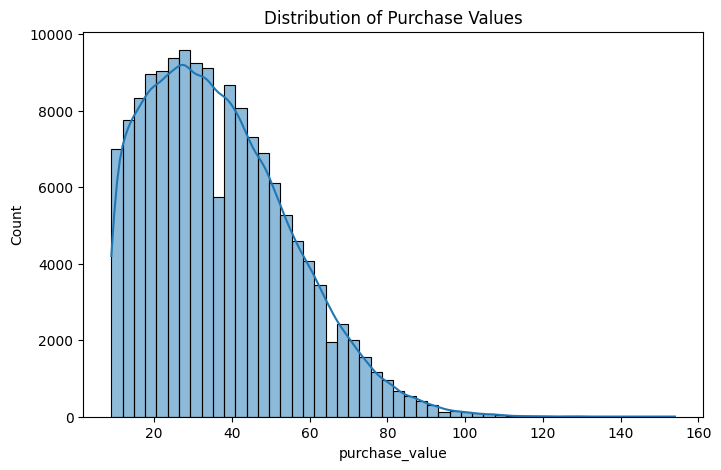

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot fraud distribution
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=fraud_df)
plt.title("Fraud vs. Non-Fraud (E-Commerce)")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()


# Browser distribution
plt.figure(figsize=(10,5))
sns.countplot(y='browser', data=fraud_df, order=fraud_df['browser'].value_counts().index)
plt.title("Most Common Browsers Used")
plt.show()

# Purchase value distribution
plt.figure(figsize=(8,5))
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title("Distribution of Purchase Values")
plt.show()


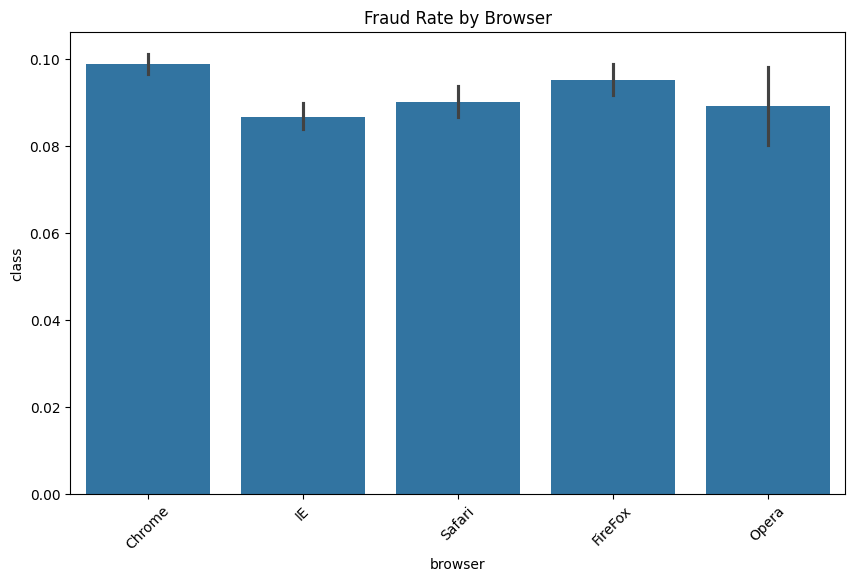

In [15]:
# Fraud by browser
plt.figure(figsize=(10,6))
sns.barplot(data=fraud_df, x='browser', y='class')
plt.title("Fraud Rate by Browser")
plt.xticks(rotation=45)
plt.show()


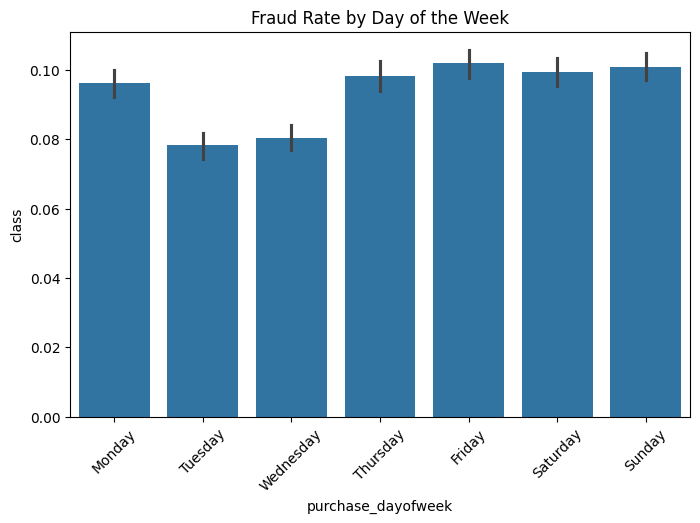

In [16]:
# Fraud rate by day of week (we'll create this column first)
fraud_df['purchase_dayofweek'] = fraud_df['purchase_time'].dt.day_name()

plt.figure(figsize=(8,5))
sns.barplot(x='purchase_dayofweek', y='class', data=fraud_df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Fraud Rate by Day of the Week")
plt.xticks(rotation=45)
plt.show()


Fraud Distribution (%):
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


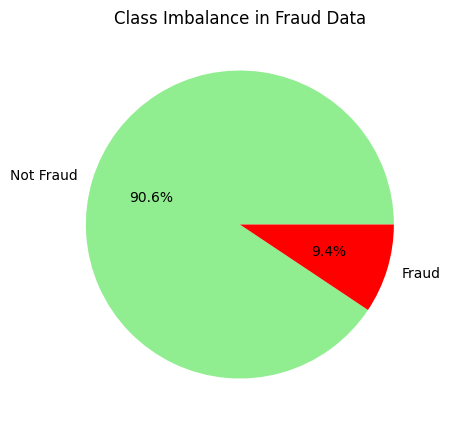

In [17]:
fraud_counts = fraud_df['class'].value_counts(normalize=True) * 100
print("Fraud Distribution (%):")
print(fraud_counts)

# Pie chart for imbalance
plt.figure(figsize=(5,5))
fraud_counts.plot(kind='pie', labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title("Class Imbalance in Fraud Data")
plt.ylabel('')
plt.show()


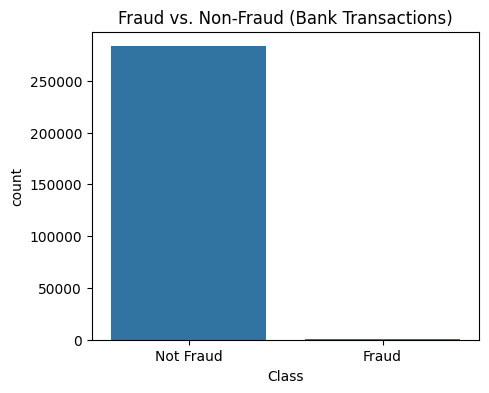

Credit card fraud rate: 0.1667101358352777 %


In [18]:
# Class distribution for credit card data
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=creditcard_df)
plt.title("Fraud vs. Non-Fraud (Bank Transactions)")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

# Imbalance rate
print("Credit card fraud rate:", creditcard_df['Class'].mean() * 100, "%")


In [25]:
# Ensure IP boundaries are integer types
# Convert float IP values to integers
fraud_df['ip_address'] = fraud_df['ip_address'].astype('int64')

ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].astype('int64')
ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].astype('int64')

In [26]:
# Function to match an IP to a country using the IP range
def find_country(ip, ip_ranges):
    match = ip_ranges[
        (ip_ranges['lower_bound_ip_address'] <= ip) &
        (ip_ranges['upper_bound_ip_address'] >= ip)
    ]
    if not match.empty:
        return match.iloc[0]['country']
    return 'Unknown'

# Apply the function to every IP
fraud_df['country'] = fraud_df['ip_address'].apply(lambda x: find_country(x, ip_country_df))


        ip_address  ip_address            country
115086  2001426399  2001426399  Korea Republic of
41990   2001426399  2001426399  Korea Republic of
134836  2001426399  2001426399  Korea Republic of
24572   2001426399  2001426399  Korea Republic of
106160  2001426399  2001426399  Korea Republic of
Top 10 countries by fraud count:
country
United States        5551
Unknown              1883
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
Canada                348
France                300
Brazil                270
Germany               262
Name: count, dtype: int64


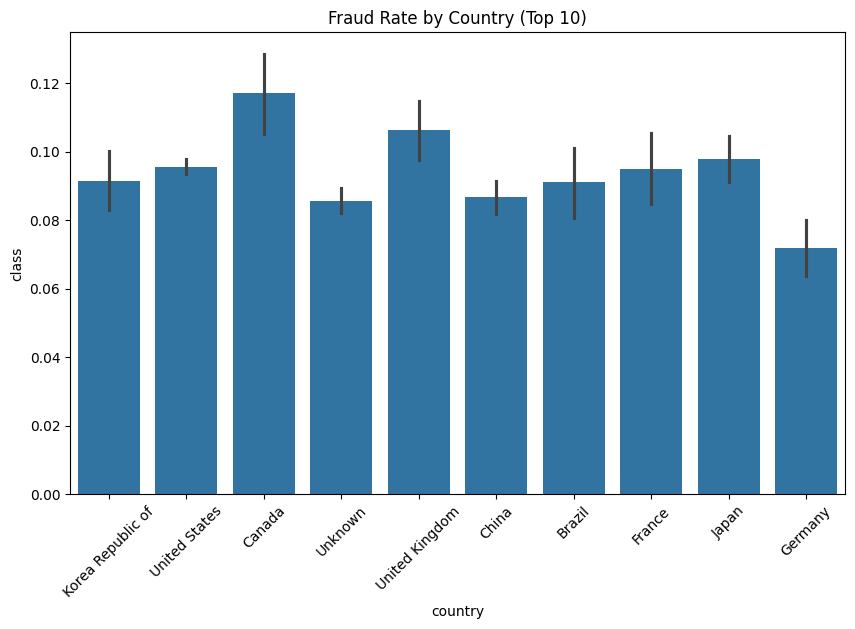

In [28]:
# Preview the result
print(fraud_df[['ip_address', 'ip_address', 'country']].head())

# Top countries involved in fraud
top_fraud_countries = fraud_df[fraud_df['class'] == 1]['country'].value_counts().head(10)
print("Top 10 countries by fraud count:")
print(top_fraud_countries)

# Plot fraud rate by top 10 countries
top_countries = fraud_df['country'].value_counts().head(10).index

plt.figure(figsize=(10,6))
sns.barplot(x='country', y='class', data=fraud_df[fraud_df['country'].isin(top_countries)])
plt.title("Fraud Rate by Country (Top 10)")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Drop ip_int if it's a duplicate
fraud_df.drop(columns=['ip_int'], inplace=True)


In [31]:
print("Fraud Data Overview:")
print(fraud_df.info(), "\n")

Fraud Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 151112 entries, 115086 to 59454
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             151112 non-null  int64         
 1   signup_time         151112 non-null  datetime64[ns]
 2   purchase_time       151112 non-null  datetime64[ns]
 3   purchase_value      151112 non-null  int64         
 4   device_id           151112 non-null  object        
 5   source              151112 non-null  object        
 6   browser             151112 non-null  object        
 7   sex                 151112 non-null  object        
 8   age                 151112 non-null  int64         
 9   ip_address          151112 non-null  int64         
 10  class               151112 non-null  int64         
 11  purchase_dayofweek  151112 non-null  object        
 12  country             151112 non-null  object        
dtypes: dateti

In [32]:
# Hour of day the purchase was made
fraud_df['purchase_hour'] = fraud_df['purchase_time'].dt.hour

# Day of the week (Monday=0, Sunday=6)
fraud_df['purchase_day'] = fraud_df['purchase_time'].dt.dayofweek

# Time since signup in hours
fraud_df['time_since_signup_hrs'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600


In [33]:
# Transaction count per user
user_tx_count = fraud_df.groupby('user_id')['purchase_value'].count().rename('user_transaction_count')

# Average purchase value per user
user_avg_value = fraud_df.groupby('user_id')['purchase_value'].mean().rename('user_avg_purchase_value')

# Std deviation of purchases per user
user_std_value = fraud_df.groupby('user_id')['purchase_value'].std().fillna(0).rename('user_purchase_std')

# Merge them into the main dataframe
fraud_df = fraud_df.merge(user_tx_count, on='user_id', how='left')
fraud_df = fraud_df.merge(user_avg_value, on='user_id', how='left')
fraud_df = fraud_df.merge(user_std_value, on='user_id', how='left')


In [34]:
# First transaction for each user?
fraud_df['is_first_transaction'] = fraud_df.groupby('user_id')['purchase_time'].rank(method='first') == 1
fraud_df['is_first_transaction'] = fraud_df['is_first_transaction'].astype('int')


In [35]:
# Frequency encoding for device and browser
device_freq = fraud_df['device_id'].value_counts().rename('device_freq')
browser_freq = fraud_df['browser'].value_counts().rename('browser_freq')

fraud_df['device_freq'] = fraud_df['device_id'].map(device_freq)
fraud_df['browser_freq'] = fraud_df['browser'].map(browser_freq)


In [36]:
print(fraud_df[['purchase_hour', 'purchase_day', 'time_since_signup_hrs', 'user_transaction_count', 'device_freq']].head())


   purchase_hour  purchase_day  time_since_signup_hrs  user_transaction_count  \
0              0             3               0.000278                       1   
1              0             3               0.000278                       1   
2              0             3               0.000278                       1   
3              0             3               0.000278                       1   
4              0             3               0.000278                       1   

   device_freq  
0           10  
1           10  
2           10  
3           10  
4           10  


In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Select numeric features
X_num = fraud_df[['purchase_hour', 'purchase_day', 'time_since_signup_hrs',
                  'user_transaction_count', 'user_avg_purchase_value',
                  'user_purchase_std', 'is_first_transaction',
                  'device_freq', 'browser_freq']]

# 2. One-hot encode categorical features
X_cat = pd.get_dummies(fraud_df[['country', 'browser']], drop_first=True)

# 3. Combine numeric + categorical before SMOTE
X_all = pd.concat([X_num, X_cat], axis=1)
y = fraud_df['class']

# 4. Apply SMOTE to full feature set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_all, y)

# 5. Scale only the numeric columns (first 9 columns)
scaler = StandardScaler()
X_resampled.iloc[:, :X_num.shape[1]] = scaler.fit_transform(X_resampled.iloc[:, :X_num.shape[1]])

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y_resampled)

# Done — X_train and X_test are now model-ready
print("Final training shape:", X_train.shape)
print("Final class balance:\n", pd.Series(y_train).value_counts())


/tmp/ipython-input-43-2787647889.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.70933374 -1.70933374 -1.70933374 ... -1.41022842  0.23485089
  0.23485089]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_resampled.iloc[:, :X_num.shape[1]] = scaler.fit_transform(X_resampled.iloc[:, :X_num.shape[1]])
/tmp/ipython-input-43-2787647889.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01205091 0.01205091 0.01205091 ... 0.01205091 1.03704996 0.52455043]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_resampled.iloc[:, :X_num.shape[1]] = scaler.fit_transform(X_resampled.iloc[:, :X_num.shape[1]])
/tmp/ipython-input-43-2787647889.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 

Final training shape: (191745, 194)
Final class balance:
 class
1    95873
0    95872
Name: count, dtype: int64


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
